In [1]:
%load_ext autoreload
%autoreload 2


In [23]:

import plate_layout as pl
import pandas as pd
import numpy as np
import logging

pl.logger.setLevel(logging.INFO)

## Create a plate layout 
Create plate design by specifying the path to a config file directly when instantiating the class, 

In [12]:
pl.Plate("./config/plate_config.toml")

[    INFO] --- Successfully loaded config file ./config/plate_config.toml
[    INFO] --- Created a plate with 96 wells: 
 [['A0' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11']
 ['B0' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'B8' 'B9' 'B10' 'B11']
 ['C0' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11']
 ['D0' 'D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11']
 ['E0' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8' 'E9' 'E10' 'E11']
 ['F0' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10' 'F11']
 ['G0' 'G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'G10' 'G11']
 ['H0' 'H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9' 'H10' 'H11']]
[    INFO] --- Setting up QC scheme from config file
[    INFO] --- Distributing specimen and QC samples on plate 
[    INFO] --- 
	[['PB_1' 'EC_1' 'S_1' 'S_2' 'S_3' 'S_4' 'S_5' 'S_6' 'S_7' 'S_8' 'S_9' 'S_10']
 ['S_11' 'PO_1' 'EC_2' 'S_12' 'S_13' 'S_14' 'S_15' 'S_16' 'S_17' 'S_18' 'S_19' 'S_20']
 ['S_21' 'S_22' 'PB_2' 'EC_3' 'S_23' 'S_24' 'S_25' 'S_26' 'S

or use the methods

[    INFO] --- Run method 'load_config_file(<path to config toml file)' to define the plate setup
[    INFO] --- Successfully loaded config file ./config/plate_config.toml
[    INFO] --- Created a plate with 96 wells: 
 [['A0' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11']
 ['B0' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'B8' 'B9' 'B10' 'B11']
 ['C0' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11']
 ['D0' 'D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11']
 ['E0' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8' 'E9' 'E10' 'E11']
 ['F0' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10' 'F11']
 ['G0' 'G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'G10' 'G11']
 ['H0' 'H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9' 'H10' 'H11']]
[    INFO] --- Setting up QC scheme from config file
[    INFO] --- Distributing specimen and QC samples on plate 
[    INFO] --- 
	[['PB_1' 'EC_1' 'S_1' 'S_2' 'S_3' 'S_4' 'S_5' 'S_6' 'S_7' 'S_8' 'S_9' 'S_10']
 ['S_11' 'PO_1' 'EC_2' 'S_12' 'S_13' 'S_14' 'S_15

Number of colors to use: 4


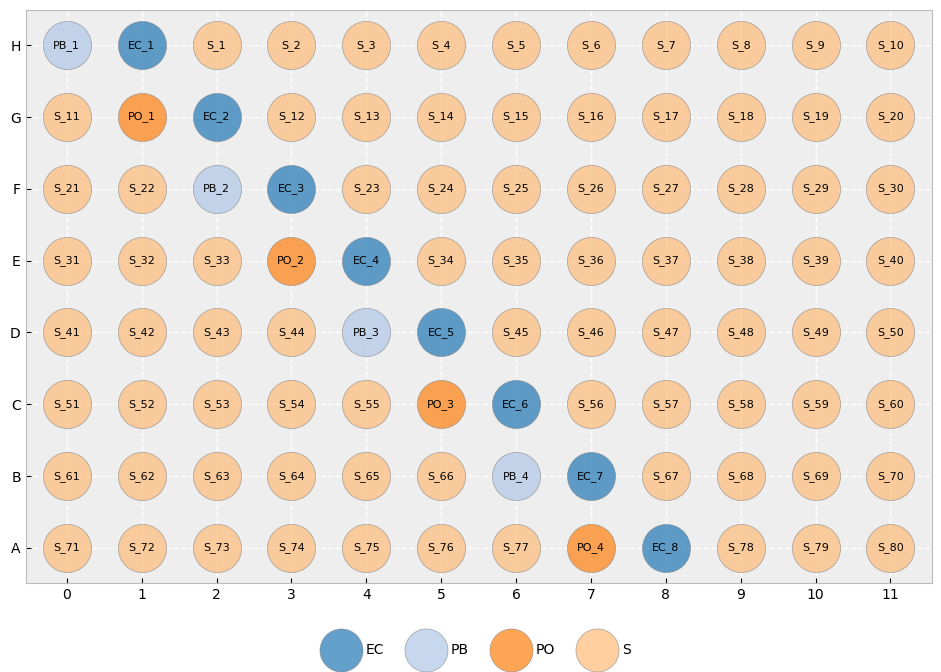

In [34]:
P = pl.Plate()

P.load_config_file("./config/plate_config.toml")
P.create_layout()
P.plot_layout()

## Load study data and randomize order 

In [19]:
datapath = "data/fake_case_control_Npairs_523_Ngroups_5.csv"
study = pd.read_csv(datapath, index_col=0)

study.set_index(["pair_ID", "specimen_ID"], inplace=True)
study.head()

In [45]:
# n_pairs = samples_df['Study_pair_ID'].max()
group_IDs = np.unique(study.index.get_level_values(0))

# Permute order in table
permutation_order = np.random.permutation(group_IDs)
study_permuted = study.loc[permutation_order].reset_index()

In [46]:
study_permuted

,pair_ID,specimen_ID,object,date_of_birth,barcode,organ
0,2,261,Control,1999-05-06,30225664,Parotid glands
1,2,262,Case,1999-05-10,12528615,Parotid glands
2,64,56,Control,1998-03-27,73095231,Descending colon
3,64,57,Case,1998-03-31,62794954,Descending colon
4,341,702,Control,1984-12-20,43678389,Mammary glands
...,...,...,...,...,...,...
1041,14,927,Case,1989-08-09,88354484,Kidneys
1042,415,13,Control,1988-07-30,68800079,Mammary glands
1043,415,14,Case,1988-07-31,81460618,Mammary glands
1044,184,420,Control,1983-12-08,88338194,Kidneys


### Batches - distributing samples on plates

In [ ]:
P.create_batches(study_permuted)
        

[    INFO] --- Finished distributing samples onto plates; 15 batches created.


Number of colors to use: 6


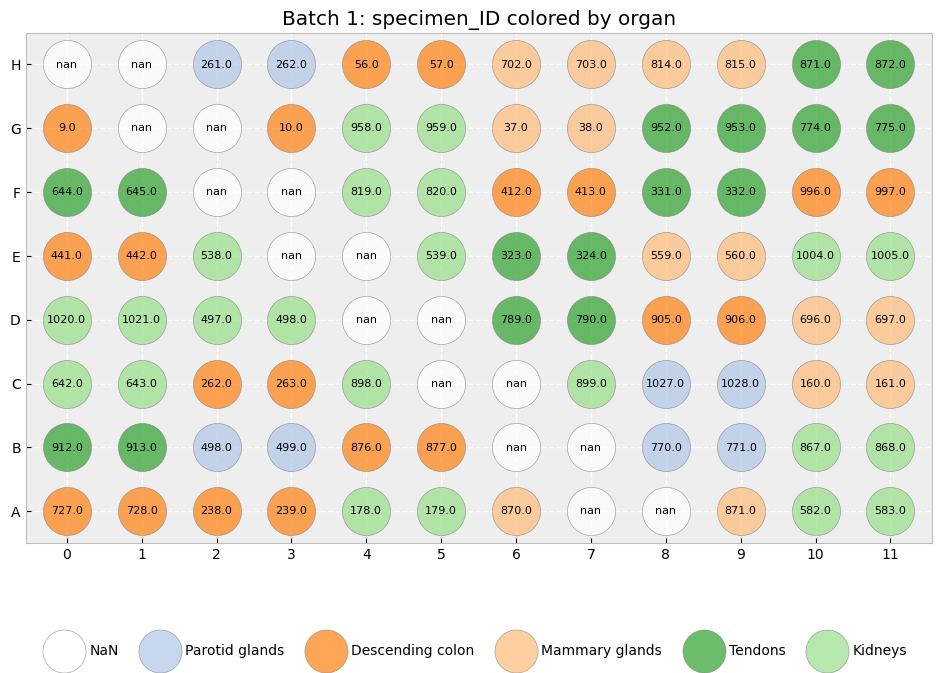

In [52]:
P.plot_batch(0, "specimen_ID", "organ")